In [3]:
import numpy as np
import cupy as cp
import time
import matplotlib.pyplot as plt

In [4]:
# Define functions

NREPEAT = 100

# CPU ForLoop
def cpu_forloop(N):
    if N>1000:
        time1=100
    else:
        Jij = np.random.random([N,N])
        x = np.random.random(N)
        y = np.zeros(N)
        time0 = time.time()
        for i in range(NREPEAT):
            for k in range(N):
                buf = 0
                for kk in range(N):
                    buf+= Jij[k,kk] * x[kk] 
                y[k] = np.tanh( buf )
        time1 = time.time()-time0
    print(N, time1)
    return time1

# CPU matrix
def cpu_matrix(N):
    if N>10000:
        time1=100
    else:
        Jij = np.random.random([N,N])
        x = np.random.random(N)
        time0 = time.time()
        for i in range(NREPEAT):
            y = np.tanh( Jij @ x  )
        time1 = time.time()-time0
    print(N, time1)
    return time1

# GPU matrix
def gpu_matrix(N):
    if N>10000:
        time1=100
    else:
        Jij = cp.random.random([N,N])
        x = cp.random.random(N)
        time0 = time.time()
        for i in range(NREPEAT):
            y = cp.tanh( Jij @ x  )
        time1 = time.time()-time0
    print(N, time1)
    return time1


1 0.0003795623779296875
1 0.0
1 0.0059473514556884766
0 / 8
3 0.000997781753540039
3 0.0
3 0.004019021987915039
1 / 8
10 0.003988981246948242
10 0.0
10 0.003990650177001953
2 / 8
31 0.026928424835205078
31 0.0
31 0.003988504409790039
3 / 8
100 0.2572798728942871
100 0.009542226791381836
100 0.003989219665527344
4 / 8
316 2.4357662200927734
316 0.009683847427368164
316 0.00498652458190918
5 / 8
1000 25.27400016784668
1000 0.010724782943725586
1000 0.003997325897216797
6 / 8
3162 100
3162 0.23424530029296875
3162 0.004987001419067383
7 / 8
10000 100
10000 2.5002822875976562
10000 0.005984067916870117
8 / 8


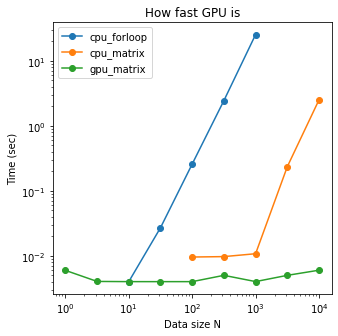

In [7]:
# Calculation

Narray = np.arange(0,4.1,0.5)
t_results = np.zeros([Narray.shape[0], 3])

for i in range(Narray.shape[0]):
    N = int(10**Narray[i])
    t_results[i,0] = cpu_forloop(N)
    t_results[i,1] = cpu_matrix(N)
    t_results[i,2] = gpu_matrix(N)
    print(f'{i} / {Narray.shape[0]-1}')

# Graph
x = 10**Narray
y = t_results.copy()
y[y<0.001] = np.nan
y[y>=100] = np.nan

plt.figure(figsize=(5,5))
plt.plot(x, y[:,0], 'o-', label="cpu_forloop")
plt.plot(x, y[:,1], 'o-', label="cpu_matrix")
plt.plot(x, y[:,2], 'o-', label="gpu_matrix")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Data size N')
plt.ylabel('Time (sec)')
plt.title('How fast GPU is')
plt.legend()
